In [2]:
import numpy as np
import matplotlib.pyplot as plt

class BP_nn(object):
        def __init__(self,X,y,hidden_size,learning_rate):
            self.hidden_size = hidden_size        #隐含层神经元个数
            self.errList = []           #误差列表
            self.n_iters = 0            #实际迭代次数
            self.tol = 1.0e-5           #最大容忍误差
            self.X = X                 #训练集特征
            self.y = y                  #训练集结果
            self.learning_rate=learning_rate
            self.x_samples, self.x_features = self.X.shape
            self.y_samples, self.y_features = y.shape
            self.weights_input_hidden = np.random.rand(self.x_features, hidden_size)
            self.weights_hidden_output = np.random.rand(hidden_size, self.y_features)
            self.bias_y = np.full((1,self.y_features),-1).astype(np.float64)
            self.bias_h = np.full((1,self.hidden_size),-1).astype(np.float64);
            self.predicted_output=0
    
        def sigmoid(x):            
            return 1 / (1 + np.exp(-x))

        # Derivative of the sigmoid function
        def sigmoid_derivative(self,x):
            return x * (1 - x)
        
        def double_sigmoid(self,x):
            return (1-np.exp(-x))/(1+np.exp(-x))
        
        def double_sigmoid_derivative(self,x):
            return 0.5*(1-x**2)
        
        def linear(self,x):
            return x;

        def linear_derivative(self,x):
            return np.ones(x.shape)
        
        def relu(self,x):
            return np.maximum(0, x)
        
        def bias_adjust(self,num):
            bias = np.full(self.x_features,num).reshape(self.x_features,1)
            return bias
            
        # Function for forward propagation
        def forward_propagation(self):
            hidden_layer_input = np.dot(self.X, self.weights_input_hidden) + np.tile(self.bias_h,(self.X.shape[0], 1))
            hidden_layer_output = self.double_sigmoid(hidden_layer_input)
            output_layer_input = np.dot(hidden_layer_output, self.weights_hidden_output)+ np.tile(self.bias_y,(self.X.shape[0], 1))
            predicted_output = self.double_sigmoid(output_layer_input)
           # print(predicted_output)
            return hidden_layer_output, predicted_output
        
        # Function to calculate loss
        def calculate_loss(self,predicted_output):
            return np.mean(np.square(self.y - predicted_output))  # Mean Squared Error
        
        # Function for backward propagation #9x5
        def backward_propagation(self, hidden_layer_output, predicted_output):
            error = self.y - predicted_output#9x3
            d_predicted_output = error * self.double_sigmoid_derivative(predicted_output)#9x3
            #print(d_predicted_output)
            error_hidden_layer = d_predicted_output.dot(self.weights_hidden_output.T) #9x5
            d_hidden_layer = error_hidden_layer * self.double_sigmoid_derivative(hidden_layer_output) #9x5
        
            # Update weights
            self.weights_hidden_output += 2*hidden_layer_output.T.dot(d_predicted_output) * self.learning_rate/self.x_samples#5x3
            self.weights_input_hidden += 2*self.X.T.dot(d_hidden_layer) * self.learning_rate/self.x_samples #2x5
            for h in range(len(d_hidden_layer)):
                self.bias_h +=  2*d_hidden_layer[h]* self.learning_rate/self.x_samples
            for y in range(len(d_predicted_output)):
                self.bias_y +=  2*d_predicted_output[y]* self.learning_rate/self.x_samples
        
        # Function to train the neural network
        def train_neural_network(self,epochs):
        
            for epoch in range(epochs):
                hidden_layer_output, self.predicted_output= self.forward_propagation()
                loss = self.calculate_loss(self.predicted_output)
                self.backward_propagation(hidden_layer_output, self.predicted_output)
                if loss < self.tol:
                    break
                self.errList.append(loss)

        def predicted(self,X_p):
            hidden_layer_input_p = np.dot(X_p, self.weights_input_hidden)+np.tile(np.mean(bp.bias_h, axis=0), (X_p.shape[0], 1))
            hidden_layer_output_p = self.double_sigmoid(hidden_layer_input_p)
            output_layer_input_p = np.dot(hidden_layer_output_p, self.weights_hidden_output)+np.tile(np.mean(bp.bias_y, axis=0), (X_p.shape[0], 1))
            #print(hidden_layer_input_p)
            #print(hidden_layer_output)
            output = self.double_sigmoid(output_layer_input_p)
            return output
        # Function to plot the loss over epochs
        def plot_loss(self):
            plt.plot(self.errList)
            plt.title('Loss over epochs')
            plt.xlabel('Epochs')
            plt.ylabel('Loss')
            plt.grid(True)
            plt.show()

# 数据压缩

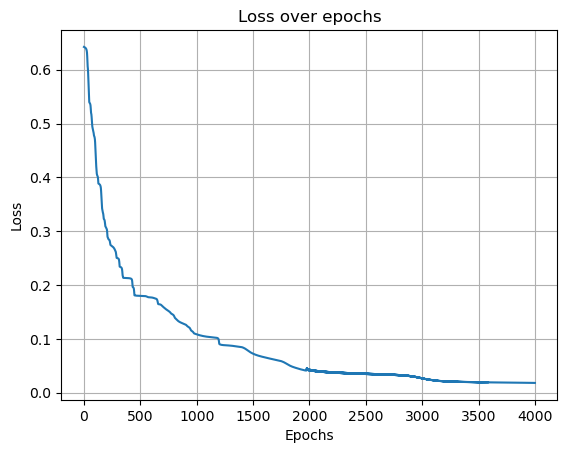

In [5]:

A = [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
B = [1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
C = [0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
D = [1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
E = [1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
F = [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
G = [0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
H = [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
I = [0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
J = [0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

x_train = np.array([A,B,C,D,E,F,G,H,I,J])
y_train = x_train
bp4 = BP_nn(x_train,y_train,15,0.1)
bp4.train_neural_network(4000)
bp4.plot_loss()
#bp4.predicted(x_train)

# 图像压缩


Training with 16 hidden units...
MSE for 16 hidden units: 0.0014

Training with 32 hidden units...
MSE for 32 hidden units: 0.0006

Training with 64 hidden units...
MSE for 64 hidden units: 0.0003

Training with 128 hidden units...
MSE for 128 hidden units: 0.0003

Training with 256 hidden units...
MSE for 256 hidden units: 0.0002


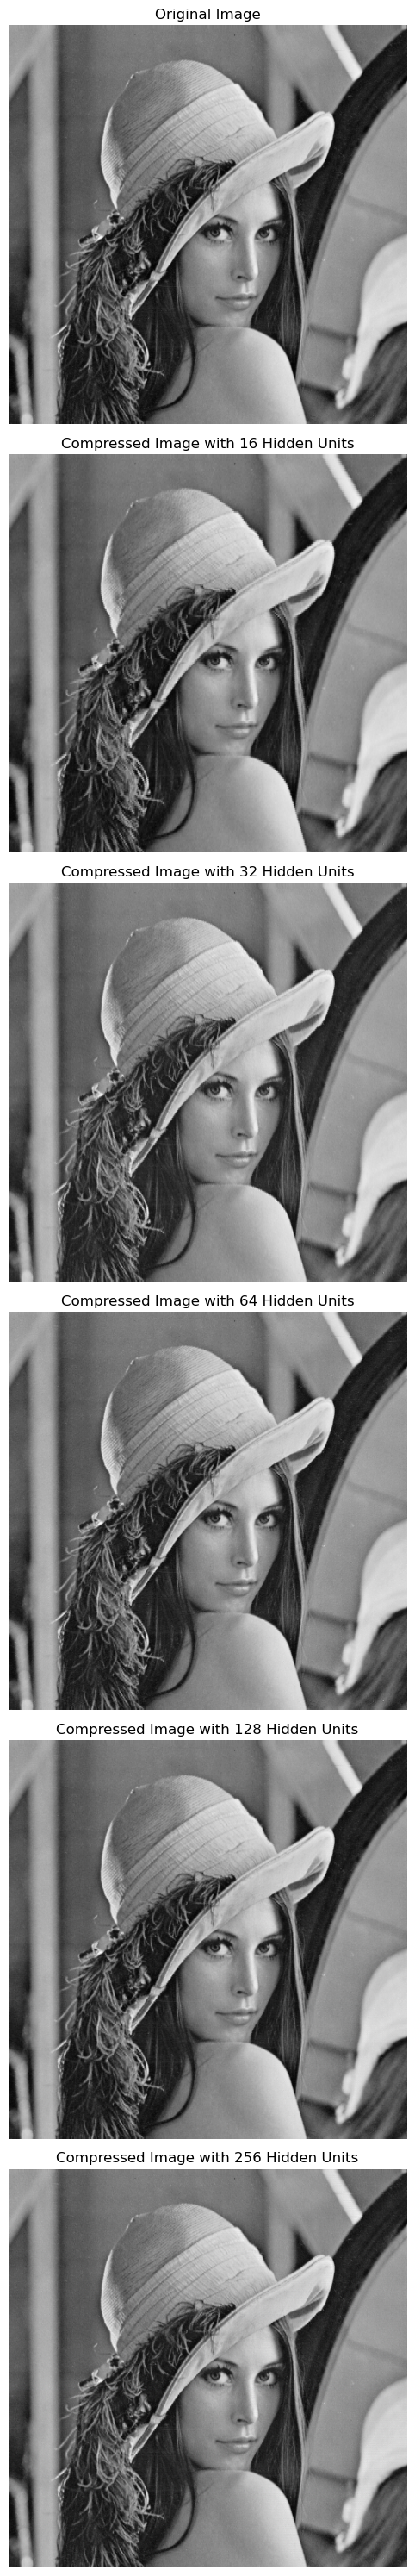

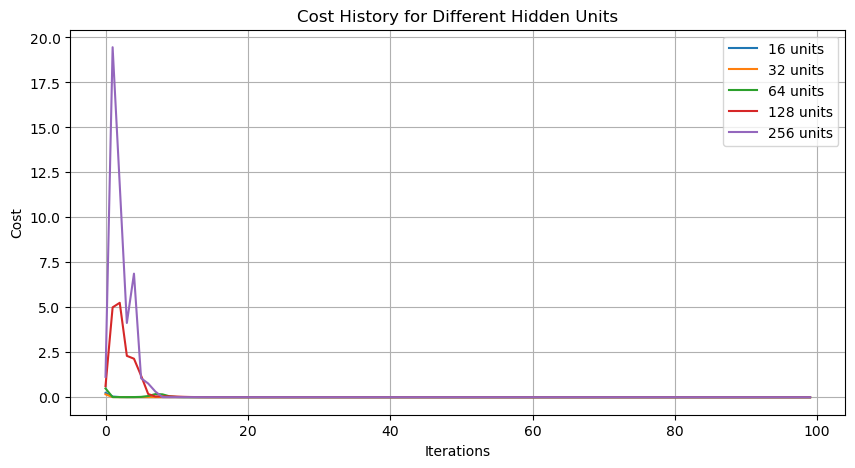

In [7]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import time

np.random.seed(int(time.time()))

# Shuffle data function
def shuffle_data(X, Y):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    return X[indices], Y[indices]

# Initialize parameters
def initialize_parameters(n_x, n_h, n_y):
    W1 = np.random.randn(n_h, n_x) * 0.5
    W2 = np.random.randn(n_y, n_h) * 0.5
    b1 = np.zeros((n_h, 1))
    b2 = np.zeros((n_y, 1))
    return {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}

# Forward propagation
def forward_propagate(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    Z1 = np.dot(W1, X.T) + b1
    A1 = (1 - np.exp(-Z1)) / (1 + np.exp(-Z1))

    Z2 = np.dot(W2, A1) + b2
    A2 = Z2

    return A2, {'Z1': Z1, 'A1': A1, 'Z2': Z2, 'A2': A2}

# Calculate cost
def calculate_cost(A2, Y):
    error = A2.T - Y.T
    cost = np.mean(np.sum(error**2, axis=1))
    return cost

# Backward propagation
def backward_propagate(parameters, cache, X, Y):
    m = X.shape[0]
    
    W1 = parameters['W1']
    W2 = parameters['W2']
    A1 = cache['A1']
    A2 = cache['A2']

    dZ2 = (A2 - Y)
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m

    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))  # 使用 A1 的导数
    dW1 = np.dot(dZ1, X) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m

    # 梯度剪切
    for grad in [dW1, db1, dW2, db2]:
        np.clip(grad, -1, 1, out=grad)

    grads = {'dW1':dW1,
             'db1':db1,
             'dW2':dW2,
             'db2':db2}

    return grads


# Update parameters
def update_parameters(parameters, grads, learning_rate):
    parameters['W1'] -= learning_rate * grads['dW1']
    parameters['b1'] -= learning_rate * grads['db1']
    parameters['W2'] -= learning_rate * grads['dW2']
    parameters['b2'] -= learning_rate * grads['db2']
    return parameters

# Image processing functions
def lena_to_blocks(blocksize, image_file):
    img = Image.open(image_file).convert('RGB')
    imgdata = np.array(img)[:, :, 0].astype(np.float32)
    imgdata = (imgdata - 128) / 256
    outdata = []

    for i in range(0, imgdata.shape[0], blocksize):
        for j in range(0, imgdata.shape[1], blocksize):
            blockdata = imgdata[i:i+blocksize, j:j+blocksize].reshape(1, -1)
            outdata.append(blockdata)

    return np.vstack(outdata)

def blocks_to_lena(blockdata):
    blocknum = blockdata.shape[0]
    blocklen = blockdata.shape[1]
    block_size = int(np.sqrt(blocklen))
    image_block_size = int(np.sqrt(blocknum))

    block_line = []
    for i in range(image_block_size):
        block_row = np.hstack([blockdata[i*image_block_size + j].reshape(block_size, block_size) 
                                for j in range(image_block_size)])
        block_line.append(block_row)

    imagedata = np.vstack(block_line)
    imagedata = (imagedata * 256 + 128)
    imagedata = np.clip(imagedata, 0, 255)
    return imagedata.astype(np.uint8)

# Training function
def train(X, Y, num_iterations, learning_rate, print_cost=False, hidden_units=10):
    n_x = X.shape[1]
    n_y = n_x
    n_h = hidden_units

    parameters = initialize_parameters(n_x, n_h, n_y)
    cost_history = []

    for i in range(num_iterations):
        A2, cache = forward_propagate(X, parameters)
        cost = calculate_cost(A2, Y)
        grads = backward_propagate(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads, learning_rate)

        if print_cost and i % 10 == 0:
            # print(f'Cost after iteration {i}: {cost}')
            cost_history.append(cost)

    return parameters, cost_history

def display_images(original_image, compressed_images, hidden_units_options):
    # 创建子图
    n = len(compressed_images) + 1  # 包括原始图像
    plt.figure(figsize=(15, 5 * n))

    # 显示原始图像
    plt.subplot(n, 1, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    # 显示压缩后的图像
    for i, (compressed_image, hidden_units) in enumerate(zip(compressed_images, hidden_units_options), start=2):
        plt.subplot(n, 1, i)
        plt.imshow(compressed_image, cmap='gray')
        plt.title(f"Compressed Image with {hidden_units} Hidden Units")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Main execution
if __name__ == "__main__":
    lena_gray = 'lena_gray.gif'
    BLOCK_SIZE = 2
    hidden_units_options = [16, 32, 64, 128, 256]  # 选择的隐层节点数目

    x_train = lena_to_blocks(BLOCK_SIZE, lena_gray)
    y_train = x_train.T
    original_image = Image.open(lena_gray).convert('L')  # 读取原始图像并转换为灰度

    compressed_images = []
    all_cost_history = []

    for hidden_units in hidden_units_options:
        print(f"\nTraining with {hidden_units} hidden units...")
        parameters, cost_history = train(x_train, y_train, num_iterations=1000, learning_rate=0.2, print_cost=True, hidden_units=hidden_units)

        A2, _ = forward_propagate(x_train, parameters)
        imagedata = blocks_to_lena(A2.T)
        compressed_images.append(imagedata)  # 保存压缩后的图像
        all_cost_history.append(cost_history)  # 保存成本历史

        # 计算MSE
        mse = calculate_cost(A2, y_train)
        print(f"MSE for {hidden_units} hidden units: {mse:.4f}")

    # 调用显示函数
    display_images(original_image, compressed_images, hidden_units_options)

    # 绘制成本曲线
    plt.figure(figsize=(10, 5))
    for cost_history, hidden_units in zip(all_cost_history, hidden_units_options):
        plt.plot(range(len(cost_history)), cost_history, label=f'{hidden_units} units')

    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.legend()
    plt.grid(True)
    plt.title("Cost History for Different Hidden Units")
    plt.show()